# Introduction
This notebook shows how to evaluate neural cross-lingual summarization (cls) models presented in paper [NCLS: Neural Cross-Lingual Summarization]( https://arxiv.org/abs/1909.00156) with Th2En dataset. Their original codes are available [here](https://github.com/ZNLP/NCLS-Corpora). <br><br>
**Neural Cross-Lingual Summarization (NCLS)** is an end-to-end cross-lingual summarization framework. The architecture of the model is based entirely on Transformer with multi-task learning: CLS+MT, and CLS+MS (cross-lingual summarization + monolingual summarization).  

---

TNCLS	refers to Transformer-based neural CLS models.

---

In MS+CLS refers to  the multi-task NCLS
model which accepts an input text and simultaneously performs text generation for both CLS and
MS tasks and calculates the total losses. <br>
`task1` refers to monolingual summarization task. <br>
`task2` refers to <i><u>cross-lingual summarization</u></i> task.

---

In MT+CLS jointly trains cross-lingual summarization with machine translation.<br>
`task1` refers to machine translation task. <br>
`task2` refers to <i><u>cross-lingual summarization</u></i> task.

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install -q torch==1.5.1 torchvision==0.6.1
!pip install -q rouge
!pip install -q bert_score

import pandas as pd
from tqdm.notebook import tqdm
import rouge
from bert_score import score

     |████████████████████████████████| 60 kB 3.1 MB/s 
     |████████████████████████████████| 3.4 MB 10.8 MB/s 
     |████████████████████████████████| 3.3 MB 37.7 MB/s 
     |████████████████████████████████| 596 kB 46.2 MB/s 
     |████████████████████████████████| 895 kB 48.8 MB/s 
     |████████████████████████████████| 61 kB 420 kB/s 


In [1]:
!git clone https://github.com/nakhunchumpolsathien/ThaiCrossSum_Corpora
%cd /content/ThaiCrossSum_Corpora/src/NCLS

Cloning into 'ThaiCrossSum_Corpora'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 124 (delta 35), reused 121 (delta 35), pack-reused 0
Receiving objects: 100% (124/124), 3.02 MiB | 6.66 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/ThaiCrossSum_Corpora/src/NCLS


# 1. Evaluate TNCLS Model
<b>[TNCLS](https://arxiv.org/pdf/1909.00156.pdf)</b>: Transformer-based NCLS models
where the input and output are different granularities combinations of unit.

## 1.1 TH2EN

In [ ]:
%cd '/content/ThaiCrossSum_Corpora/src/NCLS/code/beaver-base'
!CUDA_VISIBLE_DEVICES=0, python translate.py -config /content/ThaiCrossSum_Corpora/src/NCLS/code/beaver-base/run_config/decode-example.json

/content/NCLS-Corpora/code/beaver-base
2021-12-22 09:37:03,442 - Build dataset...
2021-12-22 09:37:04,032 - Load checkpoint from /content/drive/MyDrive/Final_Datasets/final_crosslingual_sum_datasets/published_models/th2en/ncls_base/filltered/checkpoint-step-620000.
2021-12-22 09:37:05,850 - Build model...
2021-12-22 09:37:11,838 - Start translation...
2021-12-22 09:37:18,687 - Translated:      11/   3000
2021-12-22 09:37:22,739 - Translated:      22/   3000
2021-12-22 09:37:28,046 - Translated:      33/   3000
2021-12-22 09:37:31,388 - Translated:      44/   3000
2021-12-22 09:37:35,653 - Translated:      55/   3000
2021-12-22 09:37:41,292 - Translated:      66/   3000
2021-12-22 09:37:45,605 - Translated:      77/   3000
2021-12-22 09:37:50,477 - Translated:      88/   3000
2021-12-22 09:37:57,724 - Translated:      99/   3000
2021-12-22 09:38:01,313 - Translated:     110/   3000
2021-12-22 09:38:06,747 - Translated:     121/   3000
2021-12-22 09:38:15,280 - Translated:     132/   300

### 1.1.1 Evaluate CLS results with ROUGE

In [ ]:
!rouge -f '/content/sample_data/outputs/tncls_th2en_cls.out' '/content/drive/MyDrive/Projects/Model_Checkpoints/cross-lingual-projects/NCLS/beaver-2task+/th2en/trained-on-full-dataset/test.CLS.ref.language2'  --avg

{
  "rouge-1": {
    "r": 0.1742903116781065,
    "p": 0.2295443698882641,
    "f": 0.1932900968748836
  },
  "rouge-2": {
    "r": 0.039173482222878725,
    "p": 0.04819695083597124,
    "f": 0.042082207183967935
  },
  "rouge-l": {
    "r": 0.149933633101968,
    "p": 0.19794815265228768,
    "f": 0.16635854388734594
  }
}


### 1.1.2 Evaluate CLS results with BertScore

In [ ]:
import logging
import transformers
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)
%matplotlib inline

In [ ]:
with open("/content/sample_data/outputs/tncls_th2en_cls.out") as f:
    cands = [line.strip() for line in f]

with open("/content/drive/MyDrive/Projects/Model_Checkpoints/cross-lingual-projects/NCLS/beaver-2task+/th2en/trained-on-full-dataset/test.CLS.ref.language2") as f:
    refs = [line.strip() for line in f]

In [ ]:
P, R, F1 = score(cands, refs, lang='en', verbose=False)   

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

In [ ]:
print(f"System level F1 score: {F1.mean():.3f}")
print(f"System level P score: {P.mean():.3f}")
print(f"System level R score: {R.mean():.3f}")

System level F1 score: 0.841
System level P score: 0.845
System level R score: 0.838


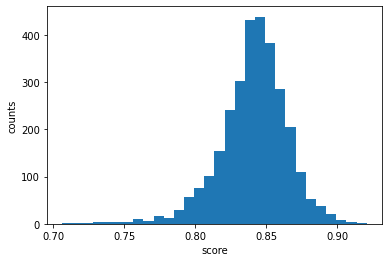

In [ ]:
import matplotlib.pyplot as plt
plt.hist(F1, bins=30)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

# 2. NCLS: CLS+MS
<b>[CLS+MS](https://arxiv.org/pdf/1909.00156.pdf)</b>: refers to the multi-task NCLS
model which accepts an input text and simultaneously performs text generation for both CLS and
MS tasks and calculates the total losses.

## 2.1 TH2EN

In [ ]:
%cd '/content/ThaiCrossSum_Corpora/src/NCLS/code/beaver-2task'
!CUDA_VISIBLE_DEVICES=0, python translate.py -config /content/ThaiCrossSum_Corpora/src/NCLS/code/beaver-2task/run_config/decode-example.json

/content/NCLS-Corpora/code/beaver-2task
Traceback (most recent call last):
  File "translate.py", line 4, in <module>
    import torch
  File "/usr/local/lib/python3.7/dist-packages/torch/__init__.py", line 197, in <module>
    from torch._C import *  # noqa: F403
RuntimeError: KeyboardInterrupt: 


### 2.1.1 Evaluate CLS results with ROUGE

In [ ]:
!rouge -f '/content/drive/MyDrive/Final_Datasets/final_crosslingual_sum_datasets/trained_models/beaver-2task/th2en-filtered/output_task2.txt' '/content/drive/MyDrive/Projects/Model_Checkpoints/cross-lingual-projects/NCLS/beaver-2task+/th2en/trained-on-full-dataset/test.CLS.ref.language2'  --avg

{
  "rouge-1": {
    "r": 0.3858049050472294,
    "p": 0.39372219376995343,
    "f": 0.3837297076449585
  },
  "rouge-2": {
    "r": 0.16255434790908982,
    "p": 0.15281108938916083,
    "f": 0.15483571943086638
  },
  "rouge-l": {
    "r": 0.3488666737447582,
    "p": 0.35552119194366316,
    "f": 0.3467819526690588
  }
}


### 2.1.2 Evaluate CLS results with BertScore

In [ ]:
with open("/content/drive/MyDrive/Final_Datasets/final_crosslingual_sum_datasets/trained_models/beaver-2task/th2en-filtered/output_task2.txt") as f:
    cands = [line.strip() for line in f]

with open("/content/drive/MyDrive/Projects/Model_Checkpoints/cross-lingual-projects/NCLS/beaver-2task+/th2en/trained-on-full-dataset/test.CLS.ref.language2") as f:
    refs = [line.strip() for line in f]

calculating scores...
computing bert embedding.


  0%|          | 0/94 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/47 [00:00<?, ?it/s]

done in 111.32 seconds, 26.95 sentences/sec
System level F1 score: 0.872
System level P score: 0.874
System level R score: 0.871


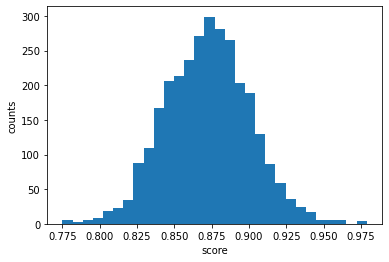

In [ ]:
P, R, F1 = score(cands, refs, lang='en', verbose=True)   
print(f"System level F1 score: {F1.mean():.3f}")
print(f"System level P score: {P.mean():.3f}")
print(f"System level R score: {R.mean():.3f}")
plt.hist(F1, bins=30)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

### 2.1.3 Evaluate MS results with ROUGE
MS = Monolingual Summarization task

In [ ]:
!rouge -f '/content/drive/MyDrive/Final_Datasets/final_crosslingual_sum_datasets/trained_models/beaver-2task/th2en-filtered/output_task1.txt' '/content/sample_data/test.MS.target.TH.txt'  --avg

{
  "rouge-1": {
    "r": 0.7198237697727017,
    "p": 0.7363944875108944,
    "f": 0.7215302792755557
  },
  "rouge-2": {
    "r": 0.6295811283839278,
    "p": 0.632974524316553,
    "f": 0.6257772368355738
  },
  "rouge-l": {
    "r": 0.7070929011920298,
    "p": 0.7214784005824385,
    "f": 0.7080960085754482
  }
}


😲 &nbsp;&nbsp; CLS+MS model performs monolingual task surprisingly well. It produces too high ROUGE scores. Let me double check.

In [ ]:
import codecs
def get_text_list(fpath):
  texts = []
  with codecs.open(fpath, encoding='utf-8') as f:
    for line in f:
      text = line.replace('!', '').replace('.', '').replace(',', '').replace('\n', '')
      text = text.replace('，', '').replace('？', '').replace('。', '')
      texts.append(text)
  return texts

In [ ]:
hypos = get_text_list('/content/drive/MyDrive/Final_Datasets/final_crosslingual_sum_datasets/trained_models/beaver-2task/th2en-filtered/output_task1.txt')
refs = get_text_list('/content/sample_data/test.MS.target.TH.txt')

In [ ]:
from rouge import Rouge
rouge = Rouge()
scores = rouge.get_scores(hypos, refs, avg=True)

In [ ]:
r1_fs = []
r2_fs = []
rl_fs = []

for i in tqdm(range(len(refs))):
  hyp = hypos[i]
  ref = refs[i]

  scores = rouge.get_scores(hyp, ref, avg=True)
  r1_fs.append(scores['rouge-1']['f'])
  r2_fs.append(scores['rouge-2']['f'])
  rl_fs.append(scores['rouge-l']['f'])

  0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
ncls2task_ms_output_df = pd.DataFrame(list(zip(refs, hypos, r1_fs, r2_fs, rl_fs)),
               columns =['ref', 'hyp', 'r1', 'r2', 'rl'])

In [ ]:
ncls2task_ms_output_df.sample(n=10)

,ref,hyp,r1,r2,rl
853,ร้านตัดผม ชื่อดัง เขต พระนคร เริ่ม เก็บกวาด ทำ...,ช่างตัดผม ชื่อดัง เขต พระนคร เริ่ม เก็บกวาด ท...,0.833333,0.833333,0.833333
924,ลุ้น ต่อ ไทย ไร้ ผู้ ติดเชื้อ ในประเทศ ต่อเนื่...,ไวรัส โค วิด - 19 ชนิด <unk> ใน 12 มิย นี้ รู้...,0.058824,0.000000,0.029412
2550,ห้างสรรพสินค้า หลาย แห่ง ใน กรุง ปักกิ่ง หยุด ...,ห้างสรรพสินค้า ขนาดใหญ่ ใน กรุง ปักกิ่ง ของ จี...,0.333333,0.105263,0.296296
2571,หนุ่มใหญ่ วัย 45 ปี ที่ นครพนม ถึงกับ เสียน้ำต...,หนุ่มใหญ่ วัย 45 ปี ที่ นครพนม ถึงกับ ร้องไห้ ...,0.857143,0.820513,0.857143
179,หยุด เชื้อ เพื่อ ชาติ ทุกคน เสียสละ อยู่ บ้าน ...,หยุด เชื้อ เพื่อ ชาติ ทุกคน เสียสละ อยู่ บ้าน ...,0.786885,0.745763,0.786885
616,พบ ซาก ลูกช้าง ป่า กุย บุรี ลอย ใน สระน้ำ ท้อง...,พบ ซาก ลูกช้าง ป่า ลอย ใน สระน้ำ ท้องที่ สภ ยา...,0.930233,0.822222,0.883721
1367,ยะลา ผ่อนปรน ระยะ 3 เปิด คิว รถตู้ โดยสาร วัน ...,ขนส่ง ยะลา เปิด เดิน รถโดยสาร 4 สาย โดย ไม่ พบ...,0.229508,0.030769,0.196721
852,ได้รับ ฉายา นางเอก 150 ล้าน แห่ง ย่าน บาง พลัด...,ได้รับ ฉายา นางเอก 150 ล้าน แห่ง ย่าน บาง พลัด...,0.833333,0.805556,0.833333
2395,สัญญาณ ดี จีน เผย ผู้ป่วย ติด เชื้อไวรัส โค โร...,สัญญาณ ดี จีน เผย ผู้ป่วย ติด เชื้อไวรัส โค โร...,0.944444,0.861111,0.944444
628,เทพ ไท ซัด กลับ สายัณห์ สส ส้ม หล่น ตะเพิด ส่ง...,เทพ ไท ซัด กลับ สส ส้ม หล่น เด้ง ส่ง ไม่ สู้ ใ...,0.877193,0.666667,0.877193


In [ ]:
print('ROUGE F1')
print(f'rouge-l: {ncls2task_ms_output_df["r1"].mean()}')
print(f'rouge-2: {ncls2task_ms_output_df["r2"].mean()}')
print(f'rouge-3: {ncls2task_ms_output_df["rl"].mean()}')

ROUGE F1
rouge-l: 0.7219156522994669
rouge-2: 0.6260024872745455
rouge-3: 0.7058408295701873


💡 💡 💡 <br>
Initial inspection of these outputs indicated that CLS+MS model tends to select the very first utterances to form monolingual summary. The leading sentences of (Thai) news articles especially contain the most important information of the news. This particular reason explains why CLS+MS model products very high ROUGE scores. However, this model might not perform well in other article domains. 


---



# 3. NCLS: CLS+MT
<b>[CLS+MT](https://arxiv.org/pdf/1909.00156.pdf)</b>: It trains CLS and MT tasks via alternating training strategy. Specifically, they optimize
the CLS task in a mini-batch, and they optimize the
MT task in the next mini-batch.


## 3.1 TH2EN

In [ ]:
%cd '/content/ThaiCrossSum_Corpora/src/NCLS/code/beaver-2task+'
!CUDA_VISIBLE_DEVICES=0, python translate.py -config /content/ThaiCrossSum_Corpora/src/NCLS/code/beaver-2task+/run_config/decode-example.json

/content/NCLS-Corpora/code/beaver-2task+
2021-12-22 11:23:20,437 - Build dataset...
2021-12-22 11:23:21,588 - Load checkpoint from /content/drive/MyDrive/Projects/Model_Checkpoints/NCLS/en-ncls-2task+.pt.
2021-12-22 11:23:32,909 - Build model...
2021-12-22 11:23:42,366 - Start translation...
2021-12-22 11:23:50,229 - Task 1:     333/   3000
2021-12-22 11:24:03,556 - Task 2:      90/   3000
2021-12-22 11:24:08,742 - Task 1:     583/   3000
2021-12-22 11:24:31,528 - Task 2:     176/   3000
2021-12-22 11:24:38,748 - Task 1:     805/   3000
2021-12-22 11:24:49,375 - Task 2:     256/   3000
2021-12-22 11:24:55,293 - Task 1:    1005/   3000
2021-12-22 11:25:06,811 - Task 2:     332/   3000
2021-12-22 11:25:12,022 - Task 1:    1186/   3000
2021-12-22 11:25:21,976 - Task 2:     408/   3000
2021-12-22 11:25:27,586 - Task 1:    1350/   3000
2021-12-22 11:27:12,184 - Task 2:     482/   3000
2021-12-22 11:27:17,121 - Task 1:    1496/   3000
2021-12-22 11:27:26,016 - Task 2:     553/   3000
2021-12

### 3.1.1 Example of CLS summary outputs

In [ ]:
hypos = get_text_list('/content/sample_data/outputs/2taskpluse_output_task2_CLS_EN.txt')
refs = get_text_list('/content/drive/MyDrive/Projects/Model_Checkpoints/cross-lingual-projects/NCLS/beaver-2task+/th2en/trained-on-full-dataset/test.CLS.ref.language2')

In [ ]:
t2e_2tpl_cls_output_df = pd.DataFrame(list(zip(refs, hypos)),
               columns =['ref', 'hyp'])

In [ ]:
t2e_2tpl_cls_output_df.sample(n=10)

,ref,hyp
2328,the great charity young boy sothon falling bra...,<unk> a young yasothon motorcycle fell to deat...
1729,security young stress family problems sit down...,the young security guard is stressed with fami...
1057,it became a drama when netizens wondered and r...,became a drama when netizens question and reve...
592,until the corner the city police chastised the...,the corner of the city police chased the cctv ...
2321,unfold another ep 3 new future opening sound c...,the new future opens a sound clip similar to <...
2756,hat yai administrative police surrounded the b...,hat yai police raided the casino <unk> and fou...
1705,mon buriram granted permission to trade and se...,buriram province ease the relaxation allow tra...
167,after the release of the song kai na a 10-year...,a young singer carrying a fern leaves the daug...
1595,mr satit wongongongtoey led the team st sat de...,mr sathit <unk> led the team of the mps announ...
2054,rosemary the former 90s singer was embarrassed...,<unk> <unk> former 90s singer accepting donati...


### 3.1.2 Evaluate CLS results with ROUGE

In [ ]:
!rouge -f '/content/sample_data/outputs/2taskpluse_output_task2_CLS_EN.txt' '/content/drive/MyDrive/Projects/Model_Checkpoints/cross-lingual-projects/NCLS/beaver-2task+/th2en/trained-on-full-dataset/test.CLS.ref.language2'  --avg

{
  "rouge-1": {
    "r": 0.40945604048470424,
    "p": 0.4958758637375246,
    "f": 0.44027445656263353
  },
  "rouge-2": {
    "r": 0.1898288055846981,
    "p": 0.21394687595752243,
    "f": 0.19697664559170205
  },
  "rouge-l": {
    "r": 0.37826546590422067,
    "p": 0.45699921995526377,
    "f": 0.40633834544527647
  }
}


### 3.1.3 Evaluate CLS results with BertScore

In [ ]:
with open("/content/sample_data/outputs/2taskpluse_output_task2_CLS_EN.txt") as f:
    cands = [line.strip() for line in f]

with open("/content/drive/MyDrive/Projects/Model_Checkpoints/cross-lingual-projects/NCLS/beaver-2task+/th2en/trained-on-full-dataset/test.CLS.ref.language2") as f:
    refs = [line.strip() for line in f]

calculating scores...
computing bert embedding.


  0%|          | 0/94 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/47 [00:00<?, ?it/s]

done in 114.27 seconds, 26.25 sentences/sec
System level F1 score: 0.879
System level P score: 0.885
System level R score: 0.875


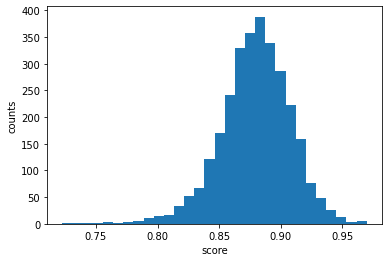

In [ ]:
P, R, F1 = score(cands, refs, lang='en', verbose=True)   
print(f"System level F1 score: {F1.mean():.3f}")
print(f"System level P score: {P.mean():.3f}")
print(f"System level R score: {R.mean():.3f}")
plt.hist(F1, bins=30)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

### 3.1.4 Evaluate MT Results with BLUE score

In [ ]:
import nltk
scores = []
for i in tqdm(range(len(refs))):
  hyp = hypos[i].split()
  ref = refs[i].split()

  scores.append(nltk.translate.bleu_score.sentence_bleu([ref], hyp))

  0%|          | 0/3000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
th2en_mt_output_df = pd.DataFrame(list(zip(refs, hypos, scores)),
               columns =['ref', 'hyp', 'bleu'])

In [ ]:
th2en_mt_output_df.sample(n=10)

,ref,hyp,bleu
786,a storm blew a chanote tree across the bridge ...,a storm blew down the chanot tree fell on the ...,0.299045
549,it will be another spectacular scene in the dr...,is another scene that is grand in the drama of...,0.463695
782,savings bank has added additional relief measu...,the government savings bank has increased the ...,0.208949
1875,suchat reveals government whip knocks day for ...,the battle of the government knocked on the da...,0.516973
2006,coming back after the government loosened the ...,go back to the government after the government...,0.152273
1617,mullika with a friend of the d.a. launched the...,mallika with friends udd open a project to buy...,0.219676
90,not least when the girl ming — rint mat boonkr...,<unk> <unk> opens up about love in club friday...,0.100826
2406,a clash between indian soldiers and chinese so...,a clash between india and china soldiers clash...,0.187701
1868,doctor and staff of the hospital. more than 30...,more than 300 khon kaen medical personnel and ...,0.204464
611,tropical storm nouri has weakened to depressio...,tropical storm manuel has weakened to a depres...,0.136792


In [ ]:
print(f'Average BLEU scores {round(th2en_mt_output_df["bleu"].mean()*100, 2)}')

Average BLEU scores 22.29


## 3.2 TH2ZH

In [ ]:
%cd /content/ThaiCrossSum_Corpora/src/NCLS/code/beaver-2task+
!CUDA_VISIBLE_DEVICES=0, python translate.py -config /content/ThaiCrossSum_Corpora/src/NCLS/code/beaver-2task+/run_config/decode-example.json

/content/NCLS-Corpora/code/beaver-2task+
2021-12-22 13:05:56,845 - Build dataset...
2021-12-22 13:05:58,758 - Load checkpoint from /content/drive/MyDrive/Final_Datasets/final_crosslingual_sum_datasets/published_models/th2zh/ncls_2task_plus/full/checkpoint-step-1055000.
2021-12-22 13:06:10,687 - Build model...
2021-12-22 13:06:24,593 - Start translation...
2021-12-22 13:10:38,707 - Task 1:     250/    611
2021-12-22 13:10:40,858 - Task 2:       4/   3000
2021-12-22 13:10:44,616 - Task 1:     416/    611
2021-12-22 13:10:45,832 - Task 2:       7/   3000
2021-12-22 13:10:49,469 - Task 1:     541/    611
2021-12-22 13:10:50,757 - Task 2:      10/   3000
2021-12-22 13:10:53,439 - Task 1:     605/    611
2021-12-22 13:10:54,565 - Task 2:      13/   3000
2021-12-22 13:10:55,546 - Task 1:     611/    611
2021-12-22 13:10:57,308 - Task 2:      16/   3000
2021-12-22 13:10:58,788 - Task 2:      19/   3000
2021-12-22 13:11:00,381 - Task 2:      22/   3000
2021-12-22 13:11:01,573 - Task 2:      25/

### 3.2.1 Examples of CLS summary output

In [ ]:
hypos = get_text_list('/content/sample_data/th2zh_output_task2.txt')
refs = get_text_list('/content/drive/MyDrive/Projects/Model_Checkpoints/XLS-proposedModel/dataset/th2zh-full/test.CLS.ref.language2')

In [ ]:
t2z_2tpl_cls_output_df = pd.DataFrame(list(zip(refs, hypos)),
               columns =['ref', 'hyp'])

In [ ]:
t2z_2tpl_cls_output_df.sample(n=10)

,ref,hyp
1972,这 位 31 岁 的 建筑 男孩 被 强调 失去 工作 因为 quovid 把 世界 绑 ...,一 名 31 岁 的 建筑 男孩 强调 失业 因为 covid - 被 绑 在 告别 世界...
278,美国 初选 进程 3 月 17 日 c面 对 焦虑 的 激动 新 的 科罗纳 病毒 株 ...,3 月 17 日 美国 的 初级 选举 进程 面临 焦虑
755,真正 的 爱情 存在 男人 已婚 男人 可以 看到 对方 1 年 前 事件 邀请 客人 见...,真正 的 爱情 是 真 的 一 个 男人 穿 着 男人 的 男人 可以 看到 对方 一 年...
2123,vishnu- 政府 发言 人 诺埃尔 春延 总理 邀请 20 泰国 亿万 富 翁 找到...,政府 发言 人 <unk> <unk> 总理 邀请 20 名 泰国 亿万 富 翁 找到 一 ...
33,bangkhan 那空 是 tammarat 的 一 名 29 岁 女孩 被 攻击 者 用螺...,一 名 29 岁 的 女孩 在 洛坤 是 谭 玛 叻 被 一 个 小偷 用 一 把 刀 刺伤...
1578,信用 卡 债务 人 现金 卡 和 个人 贷款 以 摆脱 科维- 19 危机 利息 减免...,闪耀 银行 的 泪水 债务 人 信用 卡 债务 人 信用 卡 现金 和 个人 贷款 摆脱...
2431,老 澳大利亚 走出 他 的 房间 在 苏梅 岛 突然 倒塌 在 路上 的 胡 同 中间 ...,澳大利亚 老人 走出 苏梅 岛 的 房间 突然 落 在 胡同 的 中间 立即 死亡 必...
515,中国 海图 一 号 非 人道 潜水 船 在 中太 平洋 马里亚纳 深 挑战 者 深度 109...,中国 的 一 艘 无人 潜水 船 已经 能够 在 南海 新 的 海上 潜水 记录 在 <u...
2798,兔子 马克西姆 怀孕 了 三 个 月 但 发现 前 胎盘 医生 给 她 一 个 堕 胎 ...,这 是 一 个 两 个 孩子 的 母亲 一 个 性感 的 兔子 谁 现在 怀孕 了 3 ...
1211,在 会议 上 8 月 wh 当然 11 月 sr a 贷款 所有 3 份 如 预期 ...,在 国会 议员 的 会议 星期 六 批准 a 财政 部 作 为 政府 代表 澄 清 会议...


### 3.2.2 Evaluate CLS results with ROUGE

In [ ]:
!rouge -f '/content/sample_data/th2zh_output_task2.txt' '/content/drive/MyDrive/Projects/Model_Checkpoints/XLS-proposedModel/dataset/th2zh-full/test.CLS.ref.language2'  --avg

{
  "rouge-1": {
    "r": 0.4748904619039472,
    "p": 0.5230138142483733,
    "f": 0.4906524513413928
  },
  "rouge-2": {
    "r": 0.23750876385068323,
    "p": 0.2516438104855165,
    "f": 0.24043360039338757
  },
  "rouge-l": {
    "r": 0.425923877867537,
    "p": 0.4680187194138569,
    "f": 0.4396730759469383
  }
}


### 3.2.3 Evaluate CLS results with BertScore

In [ ]:
with open("/content/sample_data/th2zh_output_task2.txt") as f:
    cands = [line.strip() for line in f]

with open("/content/drive/MyDrive/Projects/Model_Checkpoints/XLS-proposedModel/dataset/th2zh-full/test.CLS.ref.language2") as f:
    refs = [line.strip() for line in f]

In [ ]:
P, R, F1 = score(cands, refs, lang='zh', verbose=True)   

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/263k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/393M [00:00<?, ?B/s]

calculating scores...
computing bert embedding.


  0%|          | 0/94 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/47 [00:00<?, ?it/s]

done in 39.50 seconds, 75.95 sentences/sec


System level F1 score: 0.748
System level P score: 0.756
System level R score: 0.742


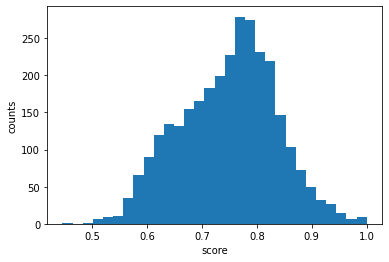

In [ ]:
print(f"System level F1 score: {F1.mean():.3f}")
print(f"System level P score: {P.mean():.3f}")
print(f"System level R score: {R.mean():.3f}")
plt.hist(F1, bins=30)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

### 3.2.4 Evaluate MT Results with BLUE score

In [ ]:
import nltk
import pandas as pd 

In [ ]:
hypos = get_text_list('/content/sample_data/th2zh_output_task1.txt')
refs = get_text_list('/content/sample_data/test.MT.target.ZH.txt')

In [ ]:
scores = []
for i in tqdm(range(len(refs))):
  hyp = hypos[i].split()
  ref = refs[i].split()

  scores.append(nltk.translate.bleu_score.sentence_bleu([ref], hyp))

  0%|          | 0/611 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
th2zh_mt_output_df = pd.DataFrame(list(zip(refs, hypos, scores)),
               columns =['ref', 'hyp', 'bleu'])

In [ ]:
th2zh_mt_output_df.sample(n=12)

,ref,hyp,bleu
570,他 早餐 只 吃 了 一 碗粥,早餐 他 只有 一 个 碗,0.711803
114,我 全力 支持 你,我 完全 支持 你,0.707107
451,是 泰国 人,我 是 泰国 人,0.707107
19,玩得 开心,玩得 开心 玩得 开心,0.638943
543,我 很 高兴 认识 你,恭喜 你 知道,0.390113
348,我 在 照顾 萨莉,我 在 照顾 三 明治,0.562341
535,谁 告诉 你 的,谁 告诉 你 谁 告诉 你,0.472871
269,我 有权 知道,我 有 没有 权利 知道 我,0.759836
571,他 喝 了 六 瓶 啤酒,他 喝 了 六 瓶 啤酒 他 喝 了 六 瓶 啤酒,0.417226
235,她 上 学去 了,她 上学 了,0.647459


In [ ]:
print(f'Average BLEU scores {round(th2zh_mt_output_df["bleu"].mean()*100, 2)}')

Average BLEU scores 52.15
